#  Perform sentimental analysis on the Elon-musk tweets

In [1]:
# Import the Libraries
import pandas as pd               # for data processing
import numpy as np                # for numerical calculation
import matplotlib.pyplot as plt   # visualization tool
import seaborn as sns             # visualization tool
import spacy                      # pre-process text for deep learning.
import string
import re
import time                       # allows to work with time 
import warnings
from tqdm.notebook  import tqdm_notebook

# import re
A Regular Expressions (RegEx) is a special sequence of characters that uses a search pattern to find a string or set of strings. It can detect the presence or absence of a text by matching it with a particular pattern, and also can split a pattern into one or more sub-patterns. Python provides a re module that supports the use of regex in Python. Its primary function is to offer a search, where it takes a regular expression and a string. Here, it either returns the first match or else none.

In [2]:
# import Libraries related to nlp related operation
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter


In [3]:
# Import the libraries from sklearn
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score,classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [4]:
#!pip install textblob

In [5]:
#!python -m textblob.download_corpora


In [6]:
#import the libraries to analise the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer

In [7]:
# # dounloading stopword corpus
# import nltk
# from nltk.corpus import stopwords
# nltk.download('punkt')
# nltk.download('stopwords')

# stopwords = set(stopwords.words('english'))


In [8]:
# nltk.download('wordnet')
# nltk.download('vader_lexicon')
# nltk.download('averaged_percepron_tragger')
# nltk.download('movie_reviews')
# nltk.download('conll2000')
# nltk.download('brown')
# %matplotlib inline

In [9]:
#load the data set
tweets=pd.read_csv("C:/Users/hp/Desktop/DATA SCIENCE COURSE/ASSIGNMENT/ASSIGNMENT 16- TEXT MINING/Elon_musk.csv",encoding='latin-1')

In [10]:
tweets

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [11]:
tweets.drop('Unnamed: 0',axis=1,inplace=True)

In [128]:
tweets

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [12]:
# insteed of text we can rename as tweets
tweets.rename({'Text':'Tweets'},axis=1,inplace=True)
tweets

,Tweets
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


# EDA
## No of characters

In [13]:
tweets['No_of_Char']=tweets['Tweets'].str.len()
tweets.head()

,Tweets,No_of_Char
0,@kunalb11 Im an alien,22
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,82
2,@joerogan @Spotify Great interview!,35
3,@gtera27 Doge is underestimated,31
4,@teslacn Congratulations Tesla China for amazi...,104


## No of Words

In [14]:
tweets['word_count']=tweets['Tweets'].apply(lambda x:len(str(x).split(' ')))
tweets.head()

,Tweets,No_of_Char,word_count
0,@kunalb11 Im an alien,22,4
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,82,13
2,@joerogan @Spotify Great interview!,35,4
3,@gtera27 Doge is underestimated,31,4
4,@teslacn Congratulations Tesla China for amazi...,104,17


# No of stopwords


In [15]:
from nltk.corpus import stopwords
stop=stopwords.words('english')
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

## No of special character

In [17]:
tweets['spec_char_count']=tweets['Tweets'].apply(lambda x:len([ x for x in x.split() if x.startswith('#')]))
tweets

,Tweets,No_of_Char,word_count,spec_char_count
0,@kunalb11 Im an alien,22,4,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,82,13,0
2,@joerogan @Spotify Great interview!,35,4,0
3,@gtera27 Doge is underestimated,31,4,0
4,@teslacn Congratulations Tesla China for amazi...,104,17,0
...,...,...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",144,23,0
1995,@PPathole Make sure to read ur terms &amp; con...,77,12,0
1996,@TeslaGong @PPathole Samwise Gamgee,35,4,0
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,59,7,0


## No of numeric

In [18]:
tweets.head()

,Tweets,No_of_Char,word_count,spec_char_count
0,@kunalb11 Im an alien,22,4,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,82,13,0
2,@joerogan @Spotify Great interview!,35,4,0
3,@gtera27 Doge is underestimated,31,4,0
4,@teslacn Congratulations Tesla China for amazi...,104,17,0


In [19]:
tweets['number_count']=tweets['Tweets'].apply(lambda x:len([x for x in x.split() if x.isdigit()]))
tweets

,Tweets,No_of_Char,word_count,spec_char_count,number_count
0,@kunalb11 Im an alien,22,4,0,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,82,13,0,0
2,@joerogan @Spotify Great interview!,35,4,0,0
3,@gtera27 Doge is underestimated,31,4,0,0
4,@teslacn Congratulations Tesla China for amazi...,104,17,0,0
...,...,...,...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",144,23,0,0
1995,@PPathole Make sure to read ur terms &amp; con...,77,12,0,0
1996,@TeslaGong @PPathole Samwise Gamgee,35,4,0,0
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,59,7,0,0


## No of upper case

In [20]:
tweets['Count_uppercase']=tweets['Tweets'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
tweets

,Tweets,No_of_Char,word_count,spec_char_count,number_count,Count_uppercase
0,@kunalb11 Im an alien,22,4,0,0,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,82,13,0,0,1
2,@joerogan @Spotify Great interview!,35,4,0,0,0
3,@gtera27 Doge is underestimated,31,4,0,0,0
4,@teslacn Congratulations Tesla China for amazi...,104,17,0,0,0
...,...,...,...,...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",144,23,0,0,0
1995,@PPathole Make sure to read ur terms &amp; con...,77,12,0,0,0
1996,@TeslaGong @PPathole Samwise Gamgee,35,4,0,0,0
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,59,7,0,0,1


## spelling correction

In [21]:
from textblob import TextBlob

In [23]:
tweets['Tweets'][:5].apply(lambda x: str(TextBlob(x).correct()))
tweets

,Tweets,No_of_Char,word_count,spec_char_count,number_count,Count_uppercase
0,@kunalb11 Im an alien,22,4,0,0,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,82,13,0,0,1
2,@joerogan @Spotify Great interview!,35,4,0,0,0
3,@gtera27 Doge is underestimated,31,4,0,0,0
4,@teslacn Congratulations Tesla China for amazi...,104,17,0,0,0
...,...,...,...,...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",144,23,0,0,0
1995,@PPathole Make sure to read ur terms &amp; con...,77,12,0,0,0
1996,@TeslaGong @PPathole Samwise Gamgee,35,4,0,0,0
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,59,7,0,0,1


In [24]:
TextBlob(tweets["Tweets"][4]).ngrams(3)

[WordList(['teslacn', 'Congratulations', 'Tesla']),
 WordList(['Congratulations', 'Tesla', 'China']),
 WordList(['Tesla', 'China', 'for']),
 WordList(['China', 'for', 'amazing']),
 WordList(['for', 'amazing', 'execution']),
 WordList(['amazing', 'execution', 'last']),
 WordList(['execution', 'last', 'year']),
 WordList(['last', 'year', 'Now']),
 WordList(['year', 'Now', 'on']),
 WordList(['Now', 'on', 'to']),
 WordList(['on', 'to', 'the']),
 WordList(['to', 'the', 'next']),
 WordList(['the', 'next', 'for']),
 WordList(['next', 'for', 'even']),
 WordList(['for', 'even', 'more'])]

# 3. Data Visualization

In [25]:
import itertools

# 4. basic text preprocessing

In [26]:
tweets.head()

,Tweets,No_of_Char,word_count,spec_char_count,number_count,Count_uppercase
0,@kunalb11 Im an alien,22,4,0,0,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,82,13,0,0,1
2,@joerogan @Spotify Great interview!,35,4,0,0,0
3,@gtera27 Doge is underestimated,31,4,0,0,0
4,@teslacn Congratulations Tesla China for amazi...,104,17,0,0,0


In [34]:
# coolecting all the tweets for preprocessing
tweets=[x.strip() for x in tweets]   #remove the leading and trainling  character
tweets=[x for x in tweets]                     
tweets[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [35]:
# remove empty string 
tweets=[x for x in tweets if x]
tweets[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [36]:
# combining all the tweets into text
tweets_text=' '.join(tweets)
tweets_text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [37]:
# removing the @username from tweets text
from nltk.tokenize import TweetTokenizer
tknz=TweetTokenizer(strip_handles=True)
tokens=tknz.tokenize(tweets_text)
print(tokens)

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https://t.co/9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https://t.co/zGxJFDzzrM', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation', '.', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'https://t.co/3rWE9uHSTS', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', ',', 'so', 'he', 'can'

In [38]:
# now join this tokenized words into single text form
tweet_token_text=" ".join(tokens)
tweet_token_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! Doge is underestimated Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox ! https://t.co/9WFKMYu2oj Frodo was the underdoge , All thought he would fail , Himself most of all . https://t.co/zGxJFDzzrM Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation . The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with https://t.co/3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X , so he can be a toddler hodler He definitely has issues , but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923> <U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to 

In [39]:
# Remove all punctuation sfrom this text
no_punct_text=tweet_token_text.translate(str.maketrans('','',string.punctuation))
no_punct_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox  httpstco9WFKMYu2oj Frodo was the underdoge  All thought he would fail  Himself most of all  httpstcozGxJFDzzrM Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with httpstco3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha httpstcoFc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Ga

In [40]:
# removing the all URL from the text
import re
no_url_text=re.sub(r'http\S+','',no_punct_text)
no_url_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox   Frodo was the underdoge  All thought he would fail  Himself most of all   Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with  It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha  Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission   Yes Once we can predict cash flow reason

In [41]:
# Again converting the text into tokens for further preprocessing
import nltk.data
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens)

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'Great', 'interview', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodler', 'He', 'definitely', 'has', 'issues', 'but', 'the', 'sentencing', 'seems', 'a', 'bit', 'high', 'Thanks', 'for', 'fixing',

In [42]:
len(text_tokens)

17847

In [43]:
# Removing the Stopword from the text
from nltk.corpus import stopwords
my_stopwords=stopwords.words('english')
stopword_list=['\x92','rt','ye','yeah','haha','yes','U0001F923','U0001F3B6','U2192','\x93','U0001F622','\x97']
my_stopwords.extend(stopword_list)


In [44]:
# text with no stopwords
no_stopword_tokens=[x for x in text_tokens if not x in my_stopwords]
print(no_stopword_tokens)

['I', 'alien', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'Great', 'interview', 'Doge', 'underestimated', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'The', 'entertaining', 'outcome', 'likely', 'Just', 'sent', 'Just', 'agree', 'Clubhouse', 'It', 'getting', 'real', 'Bought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodler', 'He', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'Thanks', 'fixing', 'Please', 'unlock', 'account', 'This', 'true', 'power', 'Any', 'crypto', 'wallet', 'give', 'private', 'keys', 'avoided', 'costs', 'Your', 'app', 'sucks', 'RT', 'NASA', 'selected', 'Falcon', 'Heavy', 'launch', 'first', 'two', 'elements', 'lunar', 'Gateway', 'together', 'one', 'mission', 'Yes', 'Once', 'predict', 

In [45]:
len(no_stopword_tokens)

11616

In [46]:
# converting all the tokens into lower case
lower_words=[x.lower() for x in no_stopword_tokens ]
print(lower_words)

['i', 'alien', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'great', 'interview', 'doge', 'underestimated', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'haha', 'thanks', 'indeed', 'tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'just', 'sent', 'just', 'agree', 'clubhouse', 'it', 'getting', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'he', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'thanks', 'fixing', 'please', 'unlock', 'account', 'this', 'true', 'power', 'any', 'crypto', 'wallet', 'give', 'private', 'keys', 'avoided', 'costs', 'your', 'app', 'sucks', 'rt', 'nasa', 'selected', 'falcon', 'heavy', 'launch', 'first', 'two', 'elements', 'lunar', 'gateway', 'together', 'one', 'mission', 'yes', 'once', 'predict', 

In [47]:
#stemmming
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stem_tokens=[ps.stem(x)  for x in lower_words]
print(stem_tokens)

['i', 'alien', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'great', 'interview', 'doge', 'underestim', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'frodo', 'underdog', 'all', 'thought', 'would', 'fail', 'himself', 'haha', 'thank', 'inde', 'tweet', 'definit', 'repres', 'realworld', 'time', 'alloc', 'the', 'entertain', 'outcom', 'like', 'just', 'sent', 'just', 'agre', 'clubhous', 'it', 'get', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'he', 'definit', 'issu', 'sentenc', 'seem', 'bit', 'high', 'thank', 'fix', 'pleas', 'unlock', 'account', 'thi', 'true', 'power', 'ani', 'crypto', 'wallet', 'give', 'privat', 'key', 'avoid', 'cost', 'your', 'app', 'suck', 'rt', 'nasa', 'select', 'falcon', 'heavi', 'launch', 'first', 'two', 'element', 'lunar', 'gateway', 'togeth', 'one', 'mission', 'ye', 'onc', 'predict', 'cash', 'flow', 'reason', 'well', 'starlink', 'ipo', 'starlink', 'staggering

In [48]:
# Lemmatization: for lemmatization we required the doc format 
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)


i alien ray tracing cyberpunk hdr nextlevel have tried great interview doge underestimated congratulations tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself haha thanks indeed tweets definitely represent realworld time allocation the entertaining outcome likely just sent just agree clubhouse it getting real bought dogecoin lil x toddler hodler he definitely issues sentencing seems bit high thanks fixing please unlock account this true power any crypto wallet give private keys avoided costs your app sucks rt nasa selected falcon heavy launch first two elements lunar gateway together one mission yes once predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however spacex needs pass deep chasm negative cash flow next year lowest cost per ton carbon sequestered net value product made must scalable g it meant price countries only difference taxes shipping this intended 

In [49]:
lemmas=[x.lemma_ for x in doc]
print(lemmas)

['I', 'alien', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'try', 'great', 'interview', 'doge', 'underestimate', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'all', 'think', 'would', 'fail', 'himself', 'haha', 'thank', 'indeed', 'tweet', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'just', 'send', 'just', 'agree', 'clubhouse', 'it', 'get', 'real', 'buy', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'he', 'definitely', 'issue', 'sentencing', 'seem', 'bit', 'high', 'thank', 'fix', 'please', 'unlock', 'account', 'this', 'true', 'power', 'any', 'crypto', 'wallet', 'give', 'private', 'key', 'avoid', 'cost', 'your', 'app', 'suck', 'rt', 'nasa', 'select', 'falcon', 'heavy', 'launch', 'first', 'two', 'element', 'lunar', 'gateway', 'together', 'one', 'mission', 'yes', 'once', 'predict', 'cash', 'flow', 'reasonably', '

In [50]:
# joint the lammatization worlds 
final_tweets=' '.join(lemmas)
final_tweets

'I alien ray trace cyberpunk hdr nextlevel have try great interview doge underestimate congratulation tesla china amazing execution last year now next even happy new year ox frodo underdoge all think would fail himself haha thank indeed tweet definitely represent realworld time allocation the entertaining outcome likely just send just agree clubhouse it get real buy dogecoin lil x toddler hodler he definitely issue sentencing seem bit high thank fix please unlock account this true power any crypto wallet give private key avoid cost your app suck rt nasa select falcon heavy launch first two element lunar gateway together one mission yes once predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however spacex need pass deep chasm negative cash flow next year low cost per ton carbon sequester net value product make must scalable g it mean price country only difference taxis ship this intend earth may idea apply mars xprize team manage 

In [51]:
# # Genarate Wordcloud
from wordcloud import WordCloud, STOPWORDS

# define the function for wordcloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    

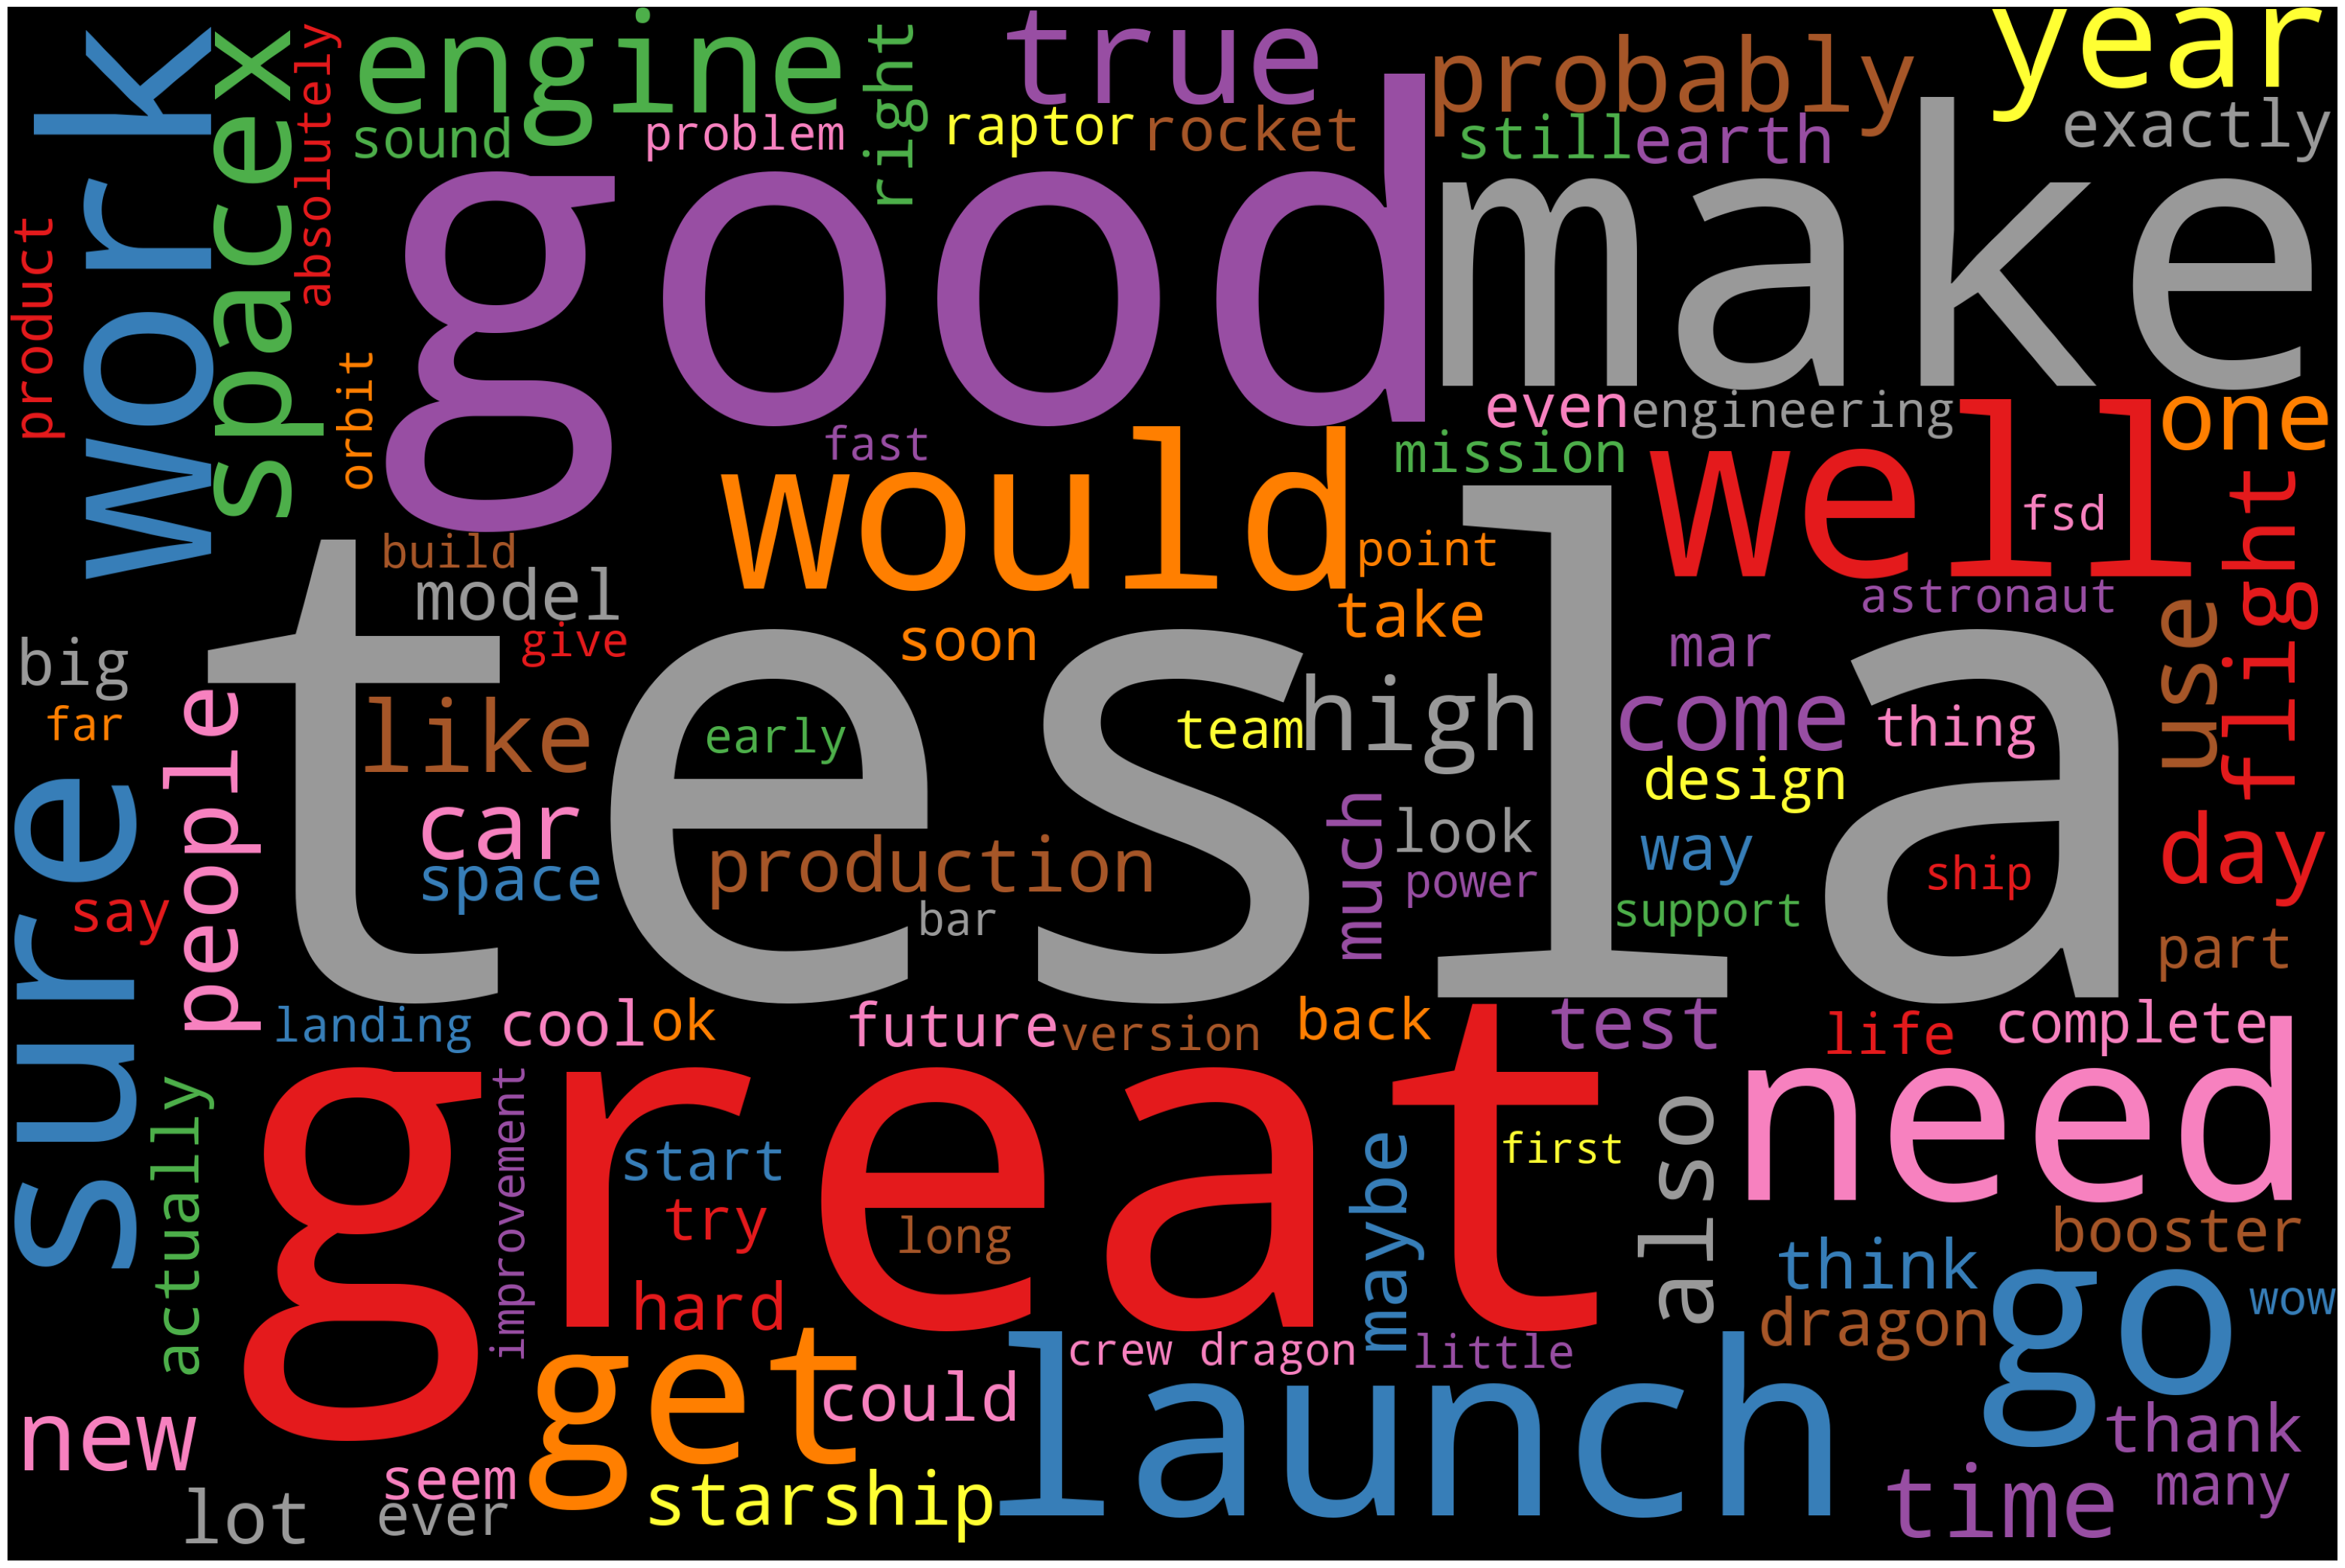

In [52]:
# generate wordcloud   if we want to remove the words which nor required in image
stopwords = STOPWORDS
stopwords.add('sure')
stopwords.add('good')
stopwords.add('great')

wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,
                      colormap='Set1',stopwords=my_stopwords).generate(final_tweets)

#plot
plot_cloud(wordcloud)


# Text Preprocessing for the sentimental analysis

# Emotion mining

In [161]:
# Sentiment Analysis
afinn= pd.read_csv("C:/Users/hp/Desktop/DATA SCIENCE COURSE/ASSIGNMENT/ASSIGNMENT 16- TEXT MINING/Afinn.csv",encoding='latin1')
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [162]:
import  string
import spacy
import re
import nltk
from nltk.corpus import stopwords
from nltk import pos_tag

from nltk.tokenize import word_tokenize

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

from matplotlib.pyplot import imread 
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline



In [163]:
tweets=pd.read_csv("C:/Users/hp/Desktop/DATA SCIENCE COURSE/ASSIGNMENT/ASSIGNMENT 16- TEXT MINING/Elon_musk.csv",encoding='latin1')
tweets

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [164]:
tweets.drop(['Unnamed: 0'],axis=1,inplace=True)


In [165]:
tweets

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [166]:
#checking for null values
tweets.isnull().sum()

Text    0
dtype: int64

In [167]:
from nltk.stem.snowball import SnowballStemmer

In [168]:
# applying stemmer

stemmer_fuct=SnowballStemmer(language='english')
stemmer_fuct

In [169]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [170]:
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))
stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [171]:
# text cleaning 
def pre_process(text):
    text=str(text).lower()
    text=re.sub(r"[-()\"#@;:{}`+=~|.?,'0-9]","",text)
    text=re.sub('https?://\S+|www\.\S+',"",text)
    text=re.sub('<.*?>+',"",text)
    text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text=re.sub('\n','',text)
    text=re.sub('\w*\d\w*','',text)
    text=[word for word in text.split(' ') if word not in stop]
    text=' '.join(text)
    text=[stemmer_fuct.stem(word) for word in text.split(' ')]
    text=' '.join(text)
    return text

In [172]:
tweets['Clean_Tweets']=tweets['Text'].apply(lambda x: pre_process(x))

In [173]:
tweets.head(10)

,Text,Clean_Tweets
0,@kunalb11 Im an alien,kunalb im alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray trace cyberpunk hdr nextlevel tri
2,@joerogan @Spotify Great interview!,joerogan spotifi great interview
3,@gtera27 Doge is underestimated,gtera doge underestim
4,@teslacn Congratulations Tesla China for amazi...,teslacn congratul tesla china amaz execut last...
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,happi new year ox httpstcowfkmyuoj
6,"Frodo was the underdoge,\nAll thought he would...",frodo underdogeal thought would failhimself ht...
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),owenspark flcnhvi anonyx haha thank
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,flcnhvi anonyx inde tweet definit repres realw...
9,The most entertaining outcome is the most likely,entertain outcom like


In [174]:
tweets['Clean_Tweets'].head(10)

0                                     kunalb im alien
1    idaacarmack ray trace cyberpunk hdr nextlevel tri
2                     joerogan spotifi great interview
3                                gtera doge underestim
4    teslacn congratul tesla china amaz execut last...
5                   happi new year ox httpstcowfkmyuoj
6    frodo underdogeal thought would failhimself ht...
7                 owenspark flcnhvi anonyx haha thank 
8    flcnhvi anonyx inde tweet definit repres realw...
9                                entertain outcom like
Name: Clean_Tweets, dtype: object

In [175]:
tweets.shape

(1999, 2)

In [176]:
tweets['Token_Tweets']=tweets['Clean_Tweets'].apply(word_tokenize)

In [177]:
tweets.head(10)

,Text,Clean_Tweets,Token_Tweets
0,@kunalb11 Im an alien,kunalb im alien,"[kunalb, im, alien]"
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray trace cyberpunk hdr nextlevel tri,"[idaacarmack, ray, trace, cyberpunk, hdr, next..."
2,@joerogan @Spotify Great interview!,joerogan spotifi great interview,"[joerogan, spotifi, great, interview]"
3,@gtera27 Doge is underestimated,gtera doge underestim,"[gtera, doge, underestim]"
4,@teslacn Congratulations Tesla China for amazi...,teslacn congratul tesla china amaz execut last...,"[teslacn, congratul, tesla, china, amaz, execu..."
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,happi new year ox httpstcowfkmyuoj,"[happi, new, year, ox, httpstcowfkmyuoj]"
6,"Frodo was the underdoge,\nAll thought he would...",frodo underdogeal thought would failhimself ht...,"[frodo, underdogeal, thought, would, failhimse..."
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),owenspark flcnhvi anonyx haha thank,"[owenspark, flcnhvi, anonyx, haha, thank]"
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,flcnhvi anonyx inde tweet definit repres realw...,"[flcnhvi, anonyx, inde, tweet, definit, repres..."
9,The most entertaining outcome is the most likely,entertain outcom like,"[entertain, outcom, like]"


In [178]:
def lemma(text):
    lemma_token=" "
    for word in text:
        lemma=word
        lemma_token=lemma_token+' '+lemma
    return lemma_token

In [179]:
tweets['lemma_tweets']=tweets['Token_Tweets'].apply(lemma)
tweets.head(10)

,Text,Clean_Tweets,Token_Tweets,lemma_tweets
0,@kunalb11 Im an alien,kunalb im alien,"[kunalb, im, alien]",kunalb im alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray trace cyberpunk hdr nextlevel tri,"[idaacarmack, ray, trace, cyberpunk, hdr, next...",idaacarmack ray trace cyberpunk hdr nextleve...
2,@joerogan @Spotify Great interview!,joerogan spotifi great interview,"[joerogan, spotifi, great, interview]",joerogan spotifi great interview
3,@gtera27 Doge is underestimated,gtera doge underestim,"[gtera, doge, underestim]",gtera doge underestim
4,@teslacn Congratulations Tesla China for amazi...,teslacn congratul tesla china amaz execut last...,"[teslacn, congratul, tesla, china, amaz, execu...",teslacn congratul tesla china amaz execut la...
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,happi new year ox httpstcowfkmyuoj,"[happi, new, year, ox, httpstcowfkmyuoj]",happi new year ox httpstcowfkmyuoj
6,"Frodo was the underdoge,\nAll thought he would...",frodo underdogeal thought would failhimself ht...,"[frodo, underdogeal, thought, would, failhimse...",frodo underdogeal thought would failhimself ...
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),owenspark flcnhvi anonyx haha thank,"[owenspark, flcnhvi, anonyx, haha, thank]",owenspark flcnhvi anonyx haha thank
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,flcnhvi anonyx inde tweet definit repres realw...,"[flcnhvi, anonyx, inde, tweet, definit, repres...",flcnhvi anonyx inde tweet definit repres rea...
9,The most entertaining outcome is the most likely,entertain outcom like,"[entertain, outcom, like]",entertain outcom like


# sentiment analysis using textblob

In [180]:
clean_data=tweets['lemma_tweets']
clean_data.head()

0                                     kunalb im alien
1      idaacarmack ray trace cyberpunk hdr nextleve...
2                     joerogan spotifi great interview
3                                gtera doge underestim
4      teslacn congratul tesla china amaz execut la...
Name: lemma_tweets, dtype: object

## Polarity score:  
    1.in between [1,-1]  
    2.if 1 then positive , if -1  negative if zero then neutral  
## subjectivity/objectivity score:  
    1.in between 0 to 1  
    2.1 indicate subjective opinion(for personal opinion) , if it is close to zero then objective opinion(factual information)

In [181]:
tweets['textblob_sentiment_polarity']=tweets['lemma_tweets'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [182]:
tweets['textblob_sentiment_subjectivity']=tweets['lemma_tweets'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [183]:
tweets.tail(10)

,Text,Clean_Tweets,Token_Tweets,lemma_tweets,textblob_sentiment_polarity,textblob_sentiment_subjectivity
1989,"@buzzindelhi Sorry, should hopefully be soon!",buzzindelhi sorri hope soon,"[buzzindelhi, sorri, hope, soon]",buzzindelhi sorri hope soon,0.000000,0.000000
1990,"@kenyanwalstreet Not actually a payout, just a...",kenyanwalstreet actual payout vest stock optio...,"[kenyanwalstreet, actual, payout, vest, stock,...",kenyanwalstreet actual payout vest stock opt...,0.000000,0.100000
1991,@IheartTesla No easy way to answer this in a t...,ihearttesla easi way answer tweet help dire br...,"[ihearttesla, easi, way, answer, tweet, help, ...",ihearttesla easi way answer tweet help dire ...,0.250000,0.333333
1992,AI symbiosis while u wait,ai symbiosi u wait,"[ai, symbiosi, u, wait]",ai symbiosi u wait,0.000000,0.000000
1993,@vistacruiser7 @flcnhvy Theres some of that too,vistacruis flcnhvi there,"[vistacruis, flcnhvi, there]",vistacruis flcnhvi there,0.000000,0.000000
1994,"@flcnhvy True, it sounds so surreal, but the n...",flcnhvi true sound surreal negat propaganda st...,"[flcnhvi, true, sound, surreal, negat, propaga...",flcnhvi true sound surreal negat propaganda ...,0.186667,0.443333
1995,@PPathole Make sure to read ur terms &amp; con...,ppathol make sure read ur term amp condit clic...,"[ppathol, make, sure, read, ur, term, amp, con...",ppathol make sure read ur term amp condit cl...,0.500000,0.888889
1996,@TeslaGong @PPathole Samwise Gamgee,teslagong ppathol samwis gamge,"[teslagong, ppathol, samwis, gamge]",teslagong ppathol samwis gamge,0.000000,0.000000
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,ppathol altho dumb dumber,"[ppathol, altho, dumb, dumber]",ppathol altho dumb dumber,-0.375000,0.500000
1998,Progress update August 28,progress updat august,"[progress, updat, august]",progress updat august,0.000000,0.000000


In [184]:
def sentiment_analysis(polarity):
    if polarity<0 :
        return 'Negative'
    elif polarity>0:
        return 'Positive'
    else:
        return 'Neutral'

In [185]:
tweets['Sentiment_Analysis']=tweets['textblob_sentiment_polarity'].apply(sentiment_analysis)
tweets.head(10)

,Text,Clean_Tweets,Token_Tweets,lemma_tweets,textblob_sentiment_polarity,textblob_sentiment_subjectivity,Sentiment_Analysis
0,@kunalb11 Im an alien,kunalb im alien,"[kunalb, im, alien]",kunalb im alien,-0.250000,0.750000,Negative
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray trace cyberpunk hdr nextlevel tri,"[idaacarmack, ray, trace, cyberpunk, hdr, next...",idaacarmack ray trace cyberpunk hdr nextleve...,0.000000,0.000000,Neutral
2,@joerogan @Spotify Great interview!,joerogan spotifi great interview,"[joerogan, spotifi, great, interview]",joerogan spotifi great interview,0.800000,0.750000,Positive
3,@gtera27 Doge is underestimated,gtera doge underestim,"[gtera, doge, underestim]",gtera doge underestim,0.000000,0.000000,Neutral
4,@teslacn Congratulations Tesla China for amazi...,teslacn congratul tesla china amaz execut last...,"[teslacn, congratul, tesla, china, amaz, execu...",teslacn congratul tesla china amaz execut la...,0.000000,0.033333,Neutral
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,happi new year ox httpstcowfkmyuoj,"[happi, new, year, ox, httpstcowfkmyuoj]",happi new year ox httpstcowfkmyuoj,0.136364,0.454545,Positive
6,"Frodo was the underdoge,\nAll thought he would...",frodo underdogeal thought would failhimself ht...,"[frodo, underdogeal, thought, would, failhimse...",frodo underdogeal thought would failhimself ...,0.000000,0.000000,Neutral
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),owenspark flcnhvi anonyx haha thank,"[owenspark, flcnhvi, anonyx, haha, thank]",owenspark flcnhvi anonyx haha thank,0.200000,0.300000,Positive
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,flcnhvi anonyx inde tweet definit repres realw...,"[flcnhvi, anonyx, inde, tweet, definit, repres...",flcnhvi anonyx inde tweet definit repres rea...,0.000000,0.000000,Neutral
9,The most entertaining outcome is the most likely,entertain outcom like,"[entertain, outcom, like]",entertain outcom like,0.000000,0.000000,Neutral


In [186]:
tweets.Sentiment_Analysis.value_counts().values

array([1137,  688,  174], dtype=int64)

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0, 0.0, '0'),
  Text(0, 200.0, '200'),
  Text(0, 400.0, '400'),
  Text(0, 600.0, '600'),
  Text(0, 800.0, '800'),
  Text(0, 1000.0, '1000'),
  Text(0, 1200.0, '1200')])

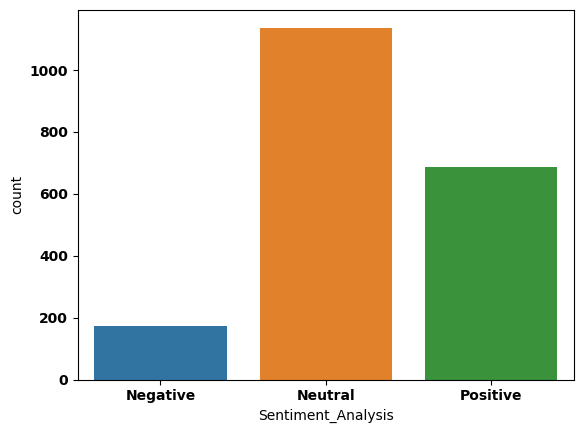

In [187]:
sns.countplot(data=tweets,x='Sentiment_Analysis')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

In [188]:
#plt.pie('Sentiment_Analysis',data=tweets)

# Sentiment Analysis Using VADER

In [189]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentiments= SentimentIntensityAnalyzer()

In [190]:
tweets['Vader_positive']=[sentiments.polarity_scores(i)['pos'] for i in tweets['lemma_tweets']]
tweets['Vader_negative']=[sentiments.polarity_scores(i)['neg'] for i in tweets['lemma_tweets']]
tweets['Vader_neutral']=[sentiments.polarity_scores(i)['neu'] for i in tweets['lemma_tweets']]
tweets['Vader_compound']=[sentiments.polarity_scores(i)['compound'] for i in tweets['lemma_tweets']]

In [191]:
def vader_analysis(compound):
    if compound >=0.5:
        return "Positive"
    elif compound <=-0.5:
        return "Negative"
    else:
        return 'Neutral'

In [192]:
tweets['Sentiment_vader']=tweets['Vader_compound'].apply(vader_analysis)
tweets

,Text,Clean_Tweets,Token_Tweets,lemma_tweets,textblob_sentiment_polarity,textblob_sentiment_subjectivity,Sentiment_Analysis,Vader_positive,Vader_negative,Vader_neutral,Vader_compound,Sentiment_vader
0,@kunalb11 Im an alien,kunalb im alien,"[kunalb, im, alien]",kunalb im alien,-0.250000,0.750000,Negative,0.000,0.000,1.000,0.0000,Neutral
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray trace cyberpunk hdr nextlevel tri,"[idaacarmack, ray, trace, cyberpunk, hdr, next...",idaacarmack ray trace cyberpunk hdr nextleve...,0.000000,0.000000,Neutral,0.000,0.000,1.000,0.0000,Neutral
2,@joerogan @Spotify Great interview!,joerogan spotifi great interview,"[joerogan, spotifi, great, interview]",joerogan spotifi great interview,0.800000,0.750000,Positive,0.577,0.000,0.423,0.6249,Positive
3,@gtera27 Doge is underestimated,gtera doge underestim,"[gtera, doge, underestim]",gtera doge underestim,0.000000,0.000000,Neutral,0.000,0.000,1.000,0.0000,Neutral
4,@teslacn Congratulations Tesla China for amazi...,teslacn congratul tesla china amaz execut last...,"[teslacn, congratul, tesla, china, amaz, execu...",teslacn congratul tesla china amaz execut la...,0.000000,0.033333,Neutral,0.000,0.000,1.000,0.0000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",flcnhvi true sound surreal negat propaganda st...,"[flcnhvi, true, sound, surreal, negat, propaga...",flcnhvi true sound surreal negat propaganda ...,0.186667,0.443333,Positive,0.177,0.127,0.696,0.2023,Neutral
1995,@PPathole Make sure to read ur terms &amp; con...,ppathol make sure read ur term amp condit clic...,"[ppathol, make, sure, read, ur, term, amp, con...",ppathol make sure read ur term amp condit cl...,0.500000,0.888889,Positive,0.380,0.000,0.620,0.5994,Positive
1996,@TeslaGong @PPathole Samwise Gamgee,teslagong ppathol samwis gamge,"[teslagong, ppathol, samwis, gamge]",teslagong ppathol samwis gamge,0.000000,0.000000,Neutral,0.000,0.000,1.000,0.0000,Neutral
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,ppathol altho dumb dumber,"[ppathol, altho, dumb, dumber]",ppathol altho dumb dumber,-0.375000,0.500000,Negative,0.000,0.744,0.256,-0.7003,Negative
